In [12]:
import torch, torch.nn as nn, time
from torch.utils.data import Dataset, DataLoader
import numpy as np
import timesynth as ts
import matplotlib.pylab as plt

In [13]:
def load_model(filepath):
    model = torch.load(filepath)
    model.eval()
    return model 

In [14]:
model = load_model('./co2-model.json')

In [15]:
import pandas as pd
df=pd.read_csv('test_co2.csv', sep=',',header=None)


In [16]:
df.shape

(5002, 384)

In [17]:
test = df.values

In [18]:
dataLoaderTest = DataLoader( test.astype('float32'), 
                                 batch_size = 1, 
                                 shuffle = False )

In [19]:
inputDimensionality = test.shape[1]

In [20]:
targetDeviceCPU = torch.device('cpu')
targetDeviceGPU = torch.device('cuda:0') 
targetDevice = targetDeviceGPU

In [21]:
def evaluate_model ( model, dataLoader, targetDevice, nEvals = 3):
    maxError = 0
    maxSamp = None
    
    for iSample in range(nEvals):

        sample = iter(dataLoader).next()[0] # get first element from sample batch        
        reconstruction = model.forward(sample.to(targetDevice))

        sampleNumpy = sample.numpy()
        reconstructionNumpy = reconstruction.data.cpu().numpy()
        error = np.sqrt( (reconstructionNumpy - sampleNumpy)**2 )
        
        if max(error) > maxError:
            
            maxError = max(error)
            maxSamp = sampleNumpy[np.where(error == maxError)[0]][0]

        plt.figure(figsize=(9,5))
        ax1 = plt.subplot2grid((4, 1), (0, 0), rowspan=3)
        ax2 = plt.subplot2grid((4, 1), (3, 0), rowspan=1, sharex=ax1)    

        ax1.plot(sampleNumpy)
        ax1.plot(reconstructionNumpy, '-.')
        #ax1.set_title('sample {}, total error {}'.format(iSample, np.sum(error)))
        ax1.set_title('total error {}'.format(np.sum(error)))
        ax1.legend(['input data', 'reconstruction'])

        ax2.plot(error)
        ax2.legend( ['reconstruction error'] )
        
    return maxError, maxSamp


(0.8467581, 2.2580526)

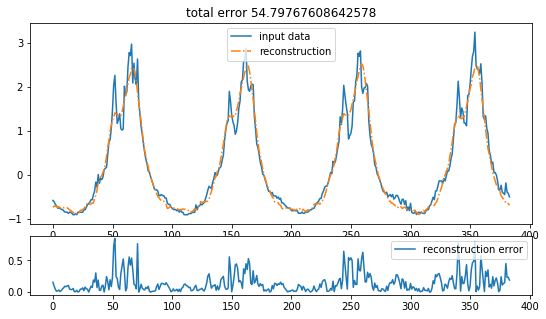

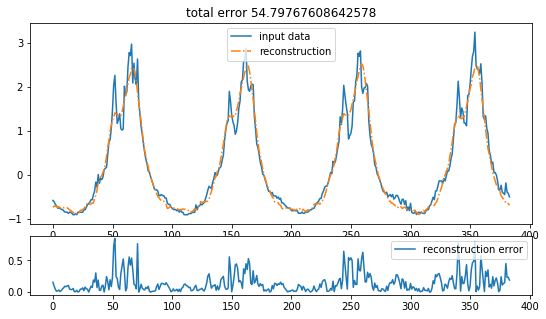

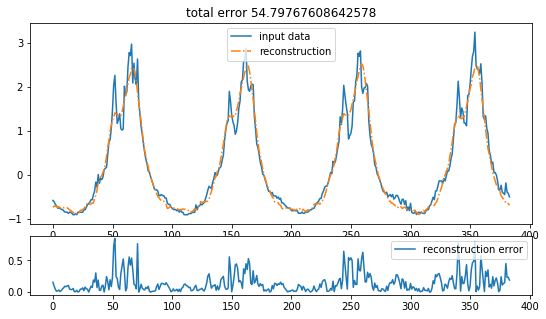

In [22]:
evaluate_model( model, dataLoaderTest, targetDeviceGPU)